Прочтём данные из файлов с результатами A/B-тестирования:

In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('datasets/orders.csv', parse_dates=['date'])

In [3]:
visitors = pd.read_csv('datasets/visitors.csv', parse_dates=['date'])

In [4]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [6]:
visitors_a = visitors.query('group == "A"').groupby(['date'], as_index=False).agg({'date' : 'max',
                                                                     'group' : 'max',
                                                                     'visitors' : 'sum'}, axis=1)
visitors_a['visitors'] = visitors_a['visitors'].cumsum()

In [7]:
visitors_a

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,1338
2,2019-08-03,A,1845
3,2019-08-04,A,2562
4,2019-08-05,A,3318
5,2019-08-06,A,3985
6,2019-08-07,A,4629
7,2019-08-08,A,5239
8,2019-08-09,A,5856
9,2019-08-10,A,6262


In [8]:
orders_aggregated = orders.groupby(['date','group'], as_index=False).agg({'date' : 'max',
                                                                          'group' : 'max',
                                                                          'transactionId' : 'nunique',
                                                                          'visitorId' : 'nunique',
                                                                          'revenue' : 'sum'}, axis=1)

In [9]:
visitors_a

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,1338
2,2019-08-03,A,1845
3,2019-08-04,A,2562
4,2019-08-05,A,3318
5,2019-08-06,A,3985
6,2019-08-07,A,4629
7,2019-08-08,A,5239
8,2019-08-09,A,5856
9,2019-08-10,A,6262


In [10]:
visitors_a_aggregated = visitors.query('group == "A"').groupby(['date'], as_index=False).agg({'date' : 'max',
                                                                                             'group' : 'max',
                                                                                             'visitors' : 'sum'}, axis=1)

In [11]:
def cumulate_column(df, column):
    grouped_by_a = df[df['group'] == 'A'][column].cumsum()
    grouped_by_b = df[df['group'] == 'B'][column].cumsum()
    cumulated = pd.concat([grouped_by_a, grouped_by_b]).reset_index()
    cumulated.sort_values(by='index', inplace=True)
    return cumulated.set_index('index')

In [12]:
visitors_aggregated = visitors.groupby(['date','group'], as_index=False).agg({'date' : 'max',
                                                                              'group' : 'max',
                                                                              'visitors' : 'sum'}, axis=1)

In [13]:
orders_aggregated = orders.groupby(['date','group'], as_index=False).agg({'date' : 'max',
                                                                          'group' : 'max',
                                                                          'transactionId' : 'nunique',
                                                                          'visitorId' : 'nunique',
                                                                          'revenue' : 'sum'}, axis=1)

In [14]:
visitors_aggregated

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507
...,...,...,...
57,2019-08-29,B,531
58,2019-08-30,A,490
59,2019-08-30,B,490
60,2019-08-31,A,699


In [15]:
orders_aggregated

,date,group,transactionId,visitorId,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,20,19,93822
3,2019-08-02,B,24,23,165531
4,2019-08-03,A,24,24,112473
...,...,...,...,...,...
57,2019-08-29,B,20,20,231130
58,2019-08-30,A,11,10,86460
59,2019-08-30,B,24,24,215233
60,2019-08-31,A,12,12,61833


In [16]:
cumulate_column(visitors_aggregated, 'visitors')

,visitors
index,
0,719
1,713
2,1338
3,1294
4,1845
...,...
57,17708
58,18037
59,18198


In [17]:
cumulate_column(orders_aggregated, 'revenue')

,revenue
index,
0,148579
1,101217
2,242401
3,266748
4,354874
...,...
57,5559398
58,4022970
59,5774631


In [18]:
visitors_aggregated['visitors'] = cumulate_column(visitors_aggregated, 'visitors')
orders_aggregated['transactionId'] = cumulate_column(orders_aggregated, 'transactionId')
orders_aggregated['visitorId'] = cumulate_column(orders_aggregated, 'visitorId')

In [19]:
visitors_aggregated

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845
...,...,...,...
57,2019-08-29,B,17708
58,2019-08-30,A,18037
59,2019-08-30,B,18198
60,2019-08-31,A,18736


In [20]:
orders_aggregated

,date,group,transactionId,visitorId,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,44,39,93822
3,2019-08-02,B,45,43,165531
4,2019-08-03,A,68,63,112473
...,...,...,...,...,...
57,2019-08-29,B,596,584,231130
58,2019-08-30,A,545,531,86460
59,2019-08-30,B,620,608,215233
60,2019-08-31,A,557,543,61833


In [21]:
cumulativeData = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(11)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,39,93822,1338
3,2019-08-02,B,45,43,165531,1294
4,2019-08-03,A,68,63,112473,1845
5,2019-08-03,B,61,59,114248,1803
6,2019-08-04,A,84,78,70825,2562
7,2019-08-04,B,78,75,108571,2573
8,2019-08-05,A,109,103,124218,3318
9,2019-08-05,B,101,98,92428,3280


In [22]:
cumulativeData = orders_aggregated.merge(visitors_aggregated)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,39,93822,1338
3,2019-08-02,B,45,43,165531,1294
4,2019-08-03,A,68,63,112473,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,584,231130,17708
58,2019-08-30,A,545,531,86460,18037
59,2019-08-30,B,620,608,215233,18198
60,2019-08-31,A,557,543,61833,18736


In [23]:
visitors[visitors['date'] == '2019-08-05']

,date,group,visitors
4,2019-08-05,A,756
35,2019-08-05,B,707


In [24]:
orders[orders['date'] == '2019-08-05'].count()

transactionId    48
visitorId        48
date             48
revenue          48
group            48
dtype: int64

In [25]:
temp = orders[orders['date'] == '2019-08-05']

In [26]:
temp.groupby(['date'], as_index=False).agg({'date' : 'max',
                                            'group' : 'max',
                                            'transactionId' : 'nunique',
                                            'visitorId' : 'nunique',
                                            'revenue' : 'sum'}, axis=1)

,date,group,transactionId,visitorId,revenue
0,2019-08-05,B,48,47,216646


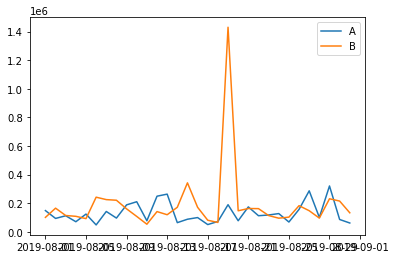

In [27]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

In [28]:
from solver.ab_reporter import ABReporter

In [29]:
example = ABReporter('datasets/visitors.csv', 'datasets/orders.csv')

In [30]:
cumulated = example.grouped_summary()

In [31]:
cumulated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        62 non-null     datetime64[ns]
 1   group       62 non-null     object        
 2   orders      62 non-null     int64         
 3   buyers      62 non-null     int64         
 4   revenue     62 non-null     int64         
 5   visitors    62 non-null     int64         
 6   conversion  62 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.9+ KB


In [32]:
    cumulated_copy = cumulated.copy()
    # cumulated_copy['date'] = cumulated_copy['date'].dt.date

In [33]:
cumulated_copy['date'] = cumulated_copy['date'].dt.date

In [34]:
cumulated_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        62 non-null     object 
 1   group       62 non-null     object 
 2   orders      62 non-null     int64  
 3   buyers      62 non-null     int64  
 4   revenue     62 non-null     int64  
 5   visitors    62 non-null     int64  
 6   conversion  62 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 3.9+ KB


In [35]:
def plot_cumulative_metrics():
    """Функция для визуализации кумулятивных метрик."""
    plt.figure(figsize=(25, 10))
    plt.style.use('seaborn-darkgrid')
    
    columns_to_pick = ['date','revenue', 'orders', 'conversion']
    cumulated_copy = cumulated.copy()
    cumulated_copy['date'] = cumulated_copy['date'].dt.date
    revenue_a = cumulated_copy.query('group == "A"')[columns_to_pick]
    revenue_b = cumulated_copy.query('group == "B"')[columns_to_pick]
    merged_revenues = revenue_a.merge(revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
    

    # кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 3, 1)
    plt.plot(revenue_a['date'], revenue_a['revenue'], label='группа A')
    plt.plot(revenue_b['date'], revenue_b['revenue'], label='группа B')
    ax1.set_xticks(revenue_a['date'][::7])
    ax1.set_xticklabels(revenue_a['date'][::7])
    plt.legend()
    plt.ylabel('Выручка')
    plt.xlabel('Лайфтайм')
    plt.title('Графики кумулятивной выручки по дням и группам')
    
    ax2 = plt.subplot(2, 3, 2, sharex=ax1)    
    plt.plot(revenue_a['date'], revenue_a['revenue']/revenue_a['orders'], label='A')
    plt.plot(revenue_b['date'], revenue_b['revenue']/revenue_b['orders'], label='B')
    plt.legend()
    plt.ylabel('Средняя сумма чека')
    plt.xlabel('Лайфтайм')
    plt.title('Графики среднего чека по группам')
              
    ax3 = plt.subplot(2, 3, 3, sharex=ax1)   
    plt.plot(merged_revenues['date'], (merged_revenues['revenueB']/merged_revenues['ordersB'])/(merged_revenues['revenueA']/merged_revenues['ordersA'])-1)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.ylabel('Отношение средних чеков')
    plt.xlabel('Лайфтайм')
    plt.title('График относительного различия для среднего чека')


    ax4 = plt.subplot(2, 3, 4, sharex=ax1)
    plt.plot(revenue_a['date'], revenue_a['conversion'], label='A')
    plt.plot(revenue_b['date'], revenue_b['conversion'], label='B')
    plt.legend()
    plt.ylabel('Конверсия')
    plt.xlabel('Лайфтайм')
    plt.title('График кумулятивной конверсии')
    
    ax5 = plt.subplot(2, 3, 5, sharex=ax1)
    plt.plot(merged_revenues['date'], merged_revenues['conversionB']/merged_revenues['conversionA']-1)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axhline(y=-0.1, color='grey', linestyle='--')
    plt.title('Относительный прирост конверсии группы B относительно группы A')
    plt.tight_layout()
    plt.show()

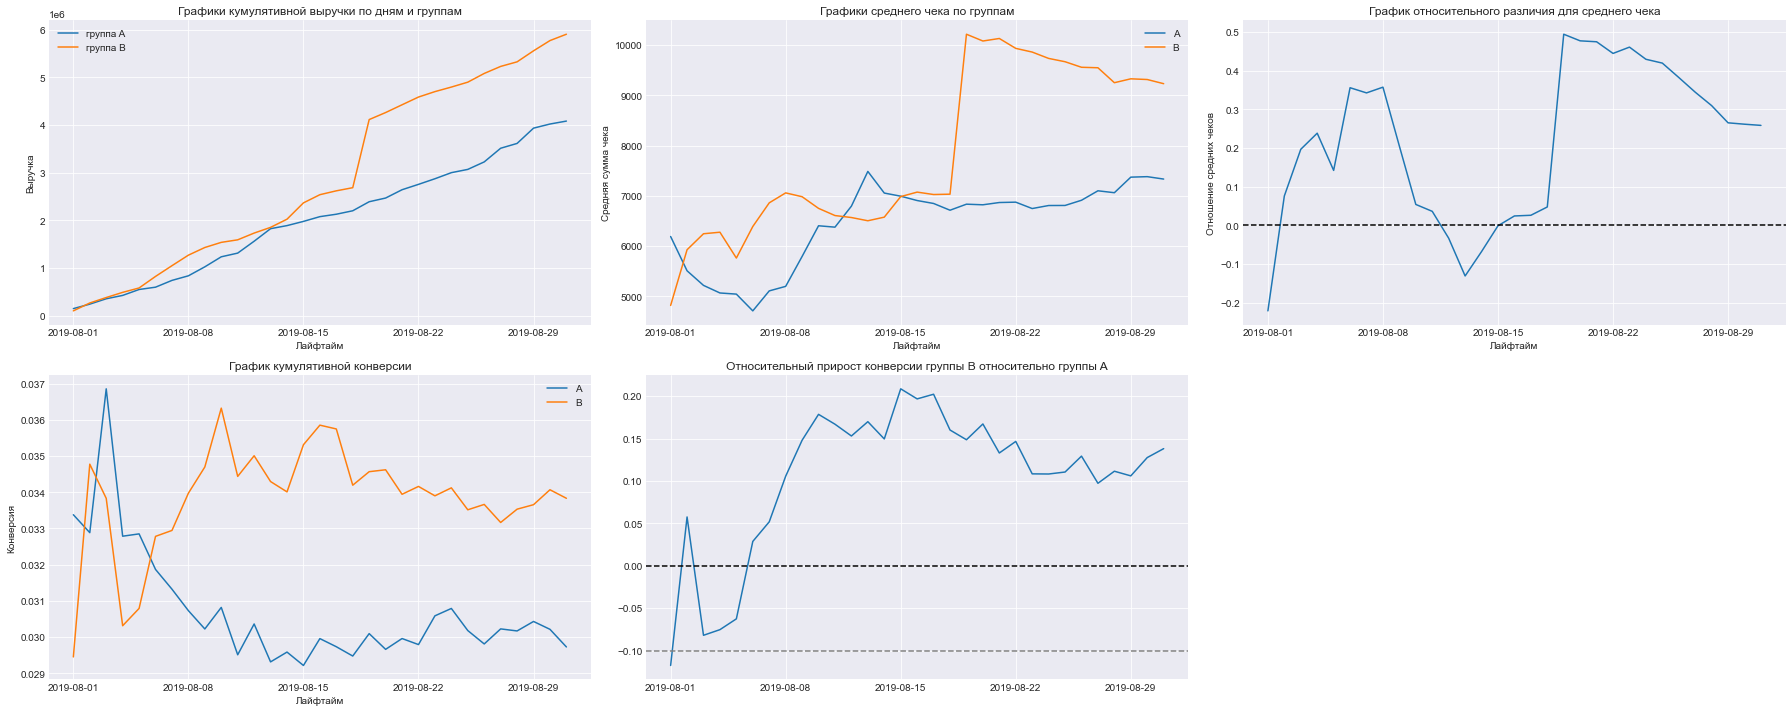

In [36]:
plot_cumulative_metrics()

<AxesSubplot:xlabel='group,date'>

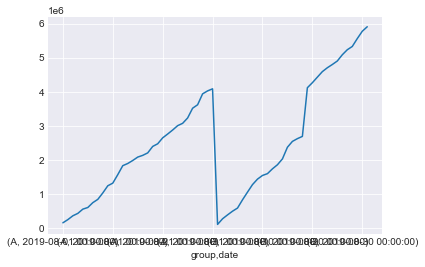

In [37]:
cumulated.groupby(['group', 'date'])['revenue'].sum().plot()

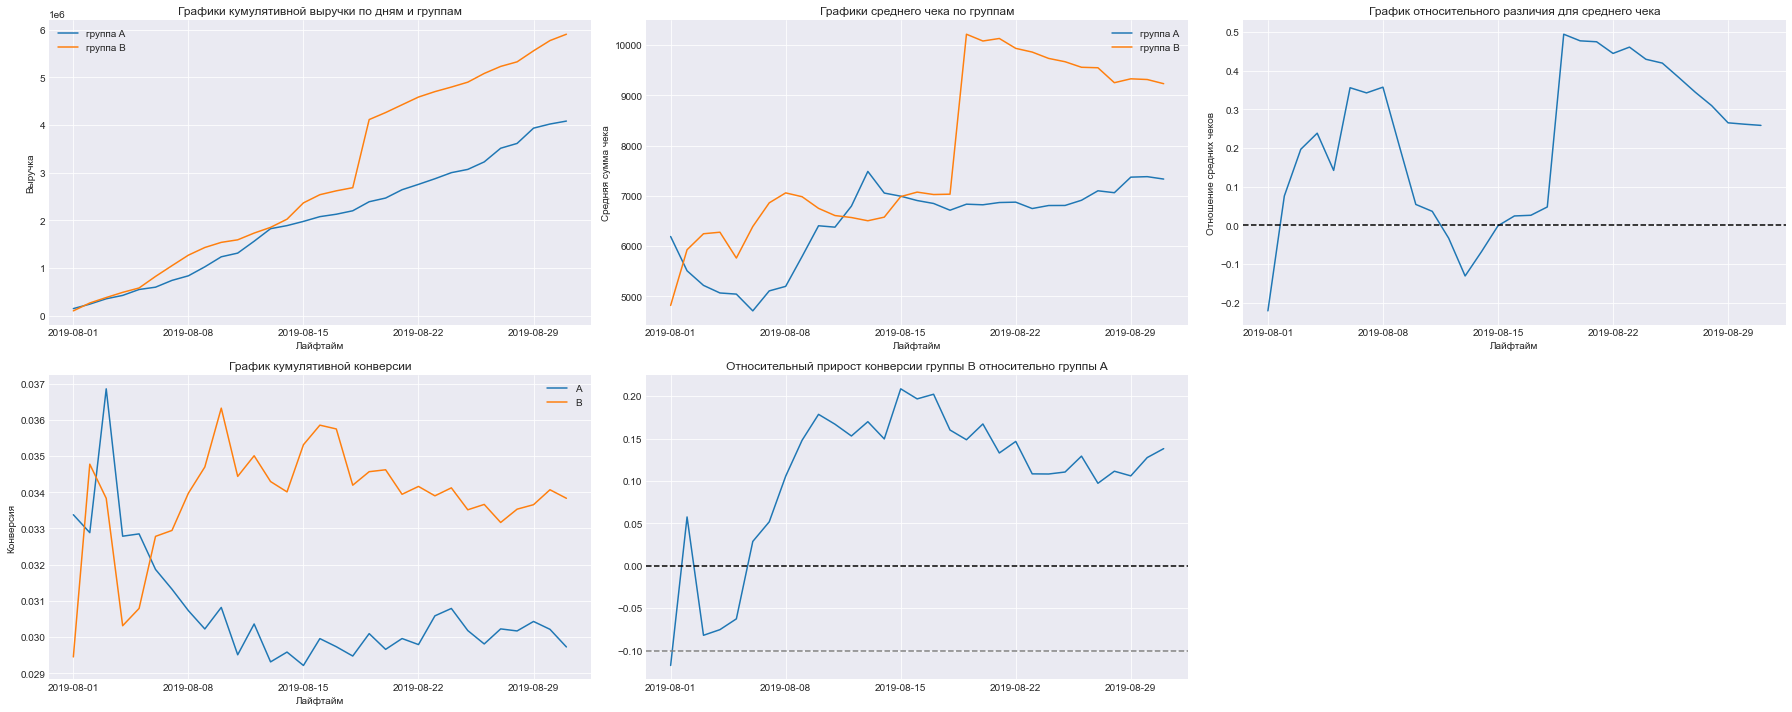

In [38]:
example.plot_cumulative_metrics()

In [39]:
columns_to_pick = ['date','revenue', 'orders']
conversion_hist = cumulated[columns_to_pick]

In [40]:
cumulated

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,39,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,63,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,584,5559398,17708,0.033657
58,2019-08-30,A,545,531,4022970,18037,0.030216
59,2019-08-30,B,620,608,5774631,18198,0.034070
60,2019-08-31,A,557,543,4084803,18736,0.029729


<AxesSubplot:>

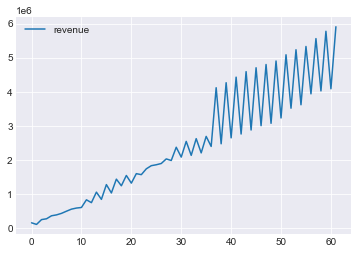

In [41]:
cumulated[['revenue']].plot()

In [42]:
columns = [name for name in conversion_hist.index.names
           if name not in ['date']]
filtered_data = conversion_hist.pivot_table(
    index='date')

In [43]:
filtered_data

,orders,revenue
date,,
2019-08-01,22.5,124898.0
2019-08-02,44.5,254574.5
2019-08-03,64.5,367935.0
2019-08-04,81.0,457633.0
2019-08-05,105.0,565956.0
2019-08-06,128.0,711369.0
2019-08-07,149.0,895244.5
2019-08-08,170.5,1053843.0
2019-08-09,191.0,1228502.0


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:


In [44]:
df = visitors.groupby(['date','group'], as_index=False).agg({'date' : 'max',
                                                        'group' : 'max',
                                                        'visitors' : 'sum'}, axis=1).sort_values(by=['date','group'])

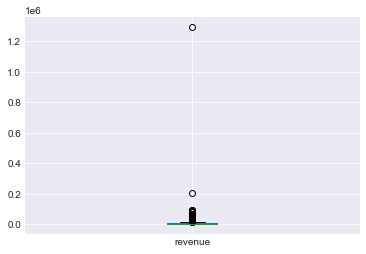

In [46]:
orders.boxplot('revenue')
plt.xlimit=2000

In [47]:
class DataExplorer:
      
    def histogram(self, data, n_bins, range_start, range_end, grid, cumulative=False, x_label = '', y_label = '', title = ''):
        
        """
        Простая гистограмма
        
        Пример:
        histogram(df, 100, 0, 150, True, 'Количество иксов', 'Количество игриков', 'Заголовок')
        
        data - датасет
        n_bins - количество корзин
        range_start - минимальный икс для корзины
        range_end - максимальный икс для корзины
        grid - рисовать сетку или нет (False / True)
        
        
        histogram(data, n_bins, range_start, range_end, grid, x_label = "", y_label = "", title = "")
        """
        
        # Создаем объект - график
        _, ax = plt.subplots()

        # Задаем параметры
        ax.hist(data, bins = n_bins, range = (range_start, range_end), cumulative = cumulative, color = '#4169E1')

        # Добавляем сетку
        if grid == True:
            ax.grid(color='grey', linestyle='-', linewidth=0.5)
        else:
            pass

        # Добавляем медиану, среднее и квартили
        ax.axvline(data.median(),linestyle = '--', color = '#FF1493', label = 'median')
        ax.axvline(data.mean(),linestyle = '--', color = 'orange', label = 'mean')
        ax.axvline(data.quantile(0.1),linestyle = '--', color = 'yellow', label = '1%')
        ax.axvline(data.quantile(0.99),linestyle = '--', color = 'yellow', label = '99%')
        ax.legend()
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
        ax.set_title(title)
        
        
    def scatterplot(self, x_data, y_data, x_label='', y_label='', title='', color = 'r', yscale_log=False, figsize = (8, 6)):
        
        """
        Простая диаграмма рассеивания
        
        Пример:
        scatterplot(df.real_target, df.predicted_target, x_label='Предсказанное моделью', y_label='Настоящий показатель', title='Диаграмма рассеивания')
        
        x_data - определяем иксы
        y_data - определяем игрики
              
        scatterplot(self, x_data, y_data, x_label='', y_label='', title='', color = 'r', yscale_log=False, figsize = (8, 6)):
        """
        
        # Создаем объект - график
        _, ax = plt.subplots(figsize = (8, 6))

        # Задаем параметры для графика, определяем размер (s), цвет и прозрачность точек на графике
        ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

        if yscale_log == True:
            ax.set_yscale('log')

        # Создаем описание осей и заголовок для графика
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        
        
    def overlaid_histogram(self, data1, data2, n_bins = 0, data1_name='', data1_color='#539caf', data2_name='', data2_color='#7663b0', x_label='', y_label='', title=''):
        
        """
        Гистогорамма для двух выборок с одинаковыми границами бинов
        Пример:
        overlaid_histogram(df.one, df.two, n_bins = 80, data1_name='Первый датасет', data2_name='Второй датасет', x_label='Признак', y_label='Частота', title='Гистограмма')
        data1 - первый датасет
        data2 - второй датасет
        n_bins - количество корзин
        """
        
        
        # Устанавливаем границы для корзин так чтобы оба распределения на графике были соотносимы
        max_nbins = 10
        data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
        binwidth = (data_range[1] - data_range[0]) / max_nbins


        if n_bins == 0:
            bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
        else: 
            bins = n_bins

        # Рисуем график
        _, ax = plt.subplots(figsize=(10,8))
        ax.hist(data1, bins = bins, color = data1_color, alpha = 0.65, label = data1_name)
        ax.hist(data2, bins = bins, color = data2_color, alpha = 0.65, label = data2_name)
        
        ax.axvline(data1.mean(),linestyle = '--', color = 'lime', label = 'mean for data 1')
                
        ax.axvline(data2.mean(),linestyle = '--', color = 'coral', label = 'mean for data 2')
                
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
        ax.set_title(title)
        ax.legend(loc = 'best')
        
        
    def lineplot(self, x_data, y_data, x_label="", y_label="", title=""):
        
                
        """
        Простой линейный график
        
        Пример:
        lineplot(df.some_x, df.some_y, x_label='Обозначения икс', y_label='Обозначения игрик', title='Заголовок')
        """
        
        
        # Создаем объект - график
        _, ax = plt.subplots(figsize=(8, 6))

        # Задаем параметры для линии: ширину (lw), цвет и прозрачность (alpha)
        ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

        # Даем имена осям и заголовок для графика
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        
        
    def double_lineplot(self, x_data_1, y_data_1, x_data_2, y_data_2, x_label='', y_label='', title='', label_one='', label_two=''):
        
        """
        Простой двойной линейный график
        
        Пример:
        double_lineplot(df.some_x_1, df.some_y_1, df.some_x_2, df.some_y_2, x_label='Обозначения икс', y_label='Обозначения игрик', title='Заголовок', label_one='Линия 1', label_two='Линия 2'):
        """
        
        
        # Создаем объект - график
        _, ax = plt.subplots(figsize=(8, 6))

        # Задаем параметры для линии: ширину (lw), цвет и прозрачность (alpha)
        ax.plot(x_data_1, y_data_1, lw = 2, color = '#6400e4', alpha = 1, label = label_one)
        ax.plot(x_data_2, y_data_2, lw = 2, color = '#ffc740', alpha = 1, label = label_two)

        # Даем имена осям и заголовок для графика
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.legend(loc = 'best')
    
        
    def hexbin(self, data, x, y):
        
        """
        Простой график с сотами
        
        Пример:
        hexbin(df, df.true_target, df.predicted_target)
        """
        
        data.plot(x = x, y = y, kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
        
        
    def bar_plotter(self, data):
        
        """
        Простой столбчатый график
        
        Пример:
        bar_plotter(data):
        """
        
        data.plot.bar(rot=0, figsize = (16, 5))
        
        
    def categorical_counter_plot(self, data, column, x = '', y = ''):
        
        """
        График для подсчета значений по категориям
        
        Пример:
        categorical_counter_plot(df, 'predicted', x = '10', y = '6'):
        """
        
        if x == '' or y == '':
            plt.rcParams["figure.figsize"] = (15, 10)
        else:
            plt.rcParams["figure.figsize"] = (x, y)
        
        order = data[column].value_counts().index
            
        ax = sns.countplot(data[column], order = order)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
        
        plt.xticks(rotation=90)
        
       
    def sns_scatterplot(self, data, x='', y='', hue='', size='', palette=''):
        
        """
        Диаграмма рассеивания seaborn
        
        Пример:
        sns_scatterplot(platform_scores_wo, 'user_score', 'total_sales', 'critic_score', 'year_of_release', True)
        """
        
        sns.set(style="whitegrid")

        f, ax = plt.subplots(figsize=(15, 10))
        
        if palette == True:
            sns.scatterplot(ax = ax, x=x, y=y, palette="ch:r=-.2,d=.3_r", 
                            hue=hue, size=size, sizes=(1, 200), linewidth=0, data=data)
        else:
            sns.scatterplot(ax = ax, x=x, y=y,
                            hue=hue, size=size, 
                            sizes=(1, 200), linewidth=0, data=data)
            
            
    def sns_catplot(self, data, x="", y="", hue=""):
        
        """
        Столбчатый график seaborn
        
        Пример:
        sns_catplot(df, x='platform', y='total_sales', hue='year')
        """
        
        
        sns.set(style='whitegrid')
        
        sns.catplot(x=x, y=y, hue=hue, kind='bar', errwidth=0, 
            data=data, height=5, aspect=3)
        
       
                
    def squared_ratio(self, df, grouper, title=''):
        
        """
        График соотношений
        
        Пример:
        squared_ratio(df, 'geography', 'Соотношение клиентов из различных стран')
        """
                
        df = df.groupby(grouper).size().reset_index(name='counts')
        labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
        sizes = df['counts'].values.tolist()
        colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

        plt.figure(figsize=(10,6), dpi= 80)
        squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

        plt.title(title)
        plt.axis('off')
        plt.show()

In [48]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

In [49]:
extra = DataExplorer()

<AxesSubplot:xlabel='revenue', ylabel='Count'>

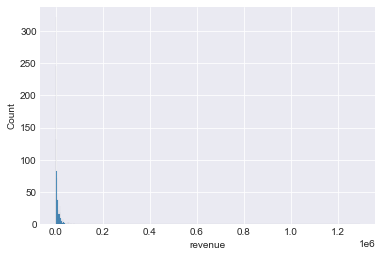

In [50]:
sns.histplot(data=orders, x="revenue")

(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <BarContainer object of 10 artists>)

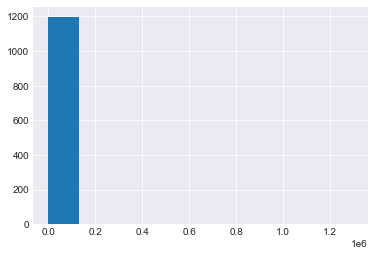

In [51]:
plt.hist(orders['revenue'])

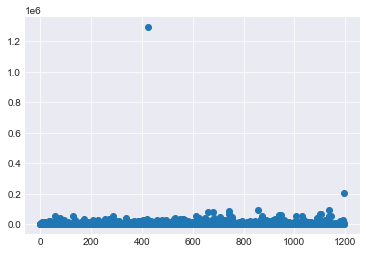

In [52]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

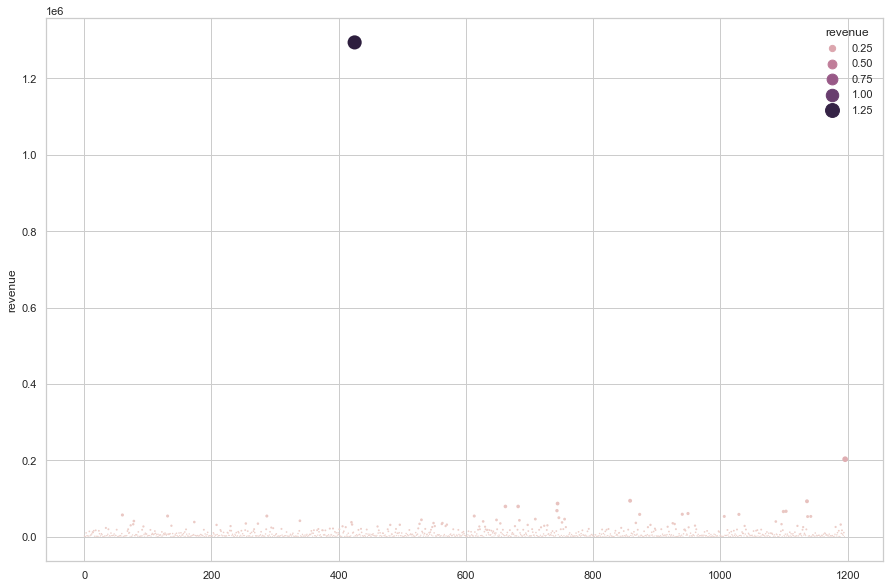

In [56]:
extra.sns_scatterplot(orders, x=x_values, y=orders['revenue'], hue=orders['revenue'], size=orders['revenue'], palette='')

Text(0.5, 1.0, 'Диаграмма размаха для выручки')

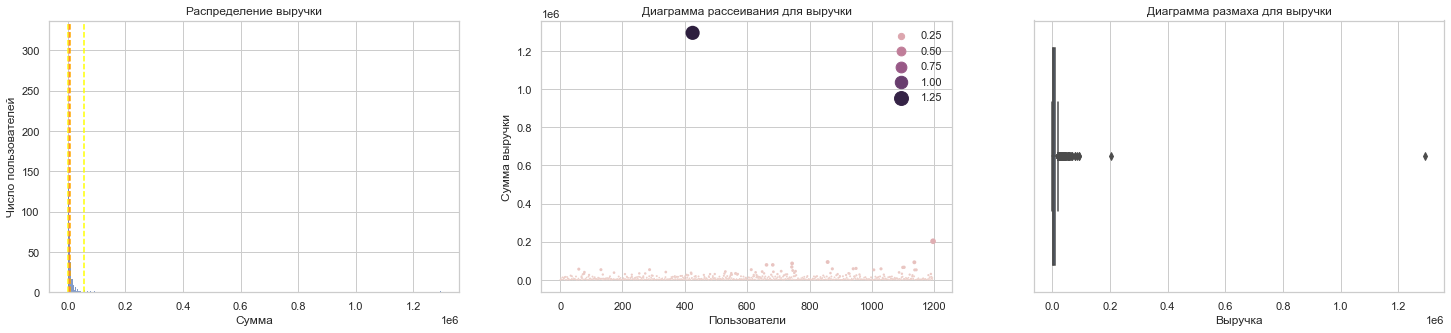

In [70]:
plt.figure(figsize=(25, 5))

ax1 = plt.subplot(1, 3, 1)
sns.histplot(data=orders, x='revenue')
ax1.axvline(orders['revenue'].median(),linestyle = '--', color = '#FF1493', label = 'median')
ax1.axvline(orders['revenue'].mean(),linestyle = '--', color = 'orange', label = 'mean')
ax1.axvline(orders['revenue'].quantile(0.1),linestyle = '--', color = 'yellow', label = '1%')
ax1.axvline(orders['revenue'].quantile(0.99),linestyle = '--', color = 'yellow', label = '99%')
plt.ylabel('Число пользователей')
plt.xlabel('Сумма')
plt.title('Распределение выручки')

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(ax=ax2, x=x_values, y=orders['revenue'], hue=orders['revenue'], size=orders['revenue'], sizes=(1, 200), linewidth=0, data=orders)
plt.legend()
plt.ylabel('Сумма выручки')
plt.xlabel('Пользователи')
plt.title('Диаграмма рассеивания для выручки')

ax = plt.subplot(1, 3, 3)
sns.boxplot(x=orders['revenue'])
plt.xlabel('Выручка')
plt.title('Диаграмма размаха для выручки')

In [73]:
def plotter(data, column):
    plt.figure(figsize=(25, 5))

    ax1 = plt.subplot(1, 3, 1)
    sns.histplot(data=data, x=column)
    ax1.axvline(data[column].median(),linestyle = '--', color = '#FF1493', label = 'median')
    ax1.axvline(data[column].mean(),linestyle = '--', color = 'orange', label = 'mean')
    ax1.axvline(data[column].quantile(0.1),linestyle = '--', color = 'yellow', label = '1%')
    ax1.axvline(data[column].quantile(0.99),linestyle = '--', color = 'yellow', label = '99%')
    plt.ylabel('Число пользователей')
    plt.xlabel('Сумма')
    plt.title('Распределение выручки')

    ax2 = plt.subplot(1, 3, 2)
    sns.scatterplot(ax=ax2, x=x_values, y=data[column], hue=data[column], size=data[column], sizes=(1, 200), linewidth=0, data=data)
    plt.legend()
    plt.ylabel('Сумма выручки')
    plt.xlabel('Пользователи')
    plt.title('Диаграмма рассеивания для выручки')

    ax = plt.subplot(1, 3, 3)
    sns.boxplot(x=data[column])
    plt.xlabel('Выручка')
    plt.title('Диаграмма размаха для выручки')
    plt.tight_layout()
    plt.show()

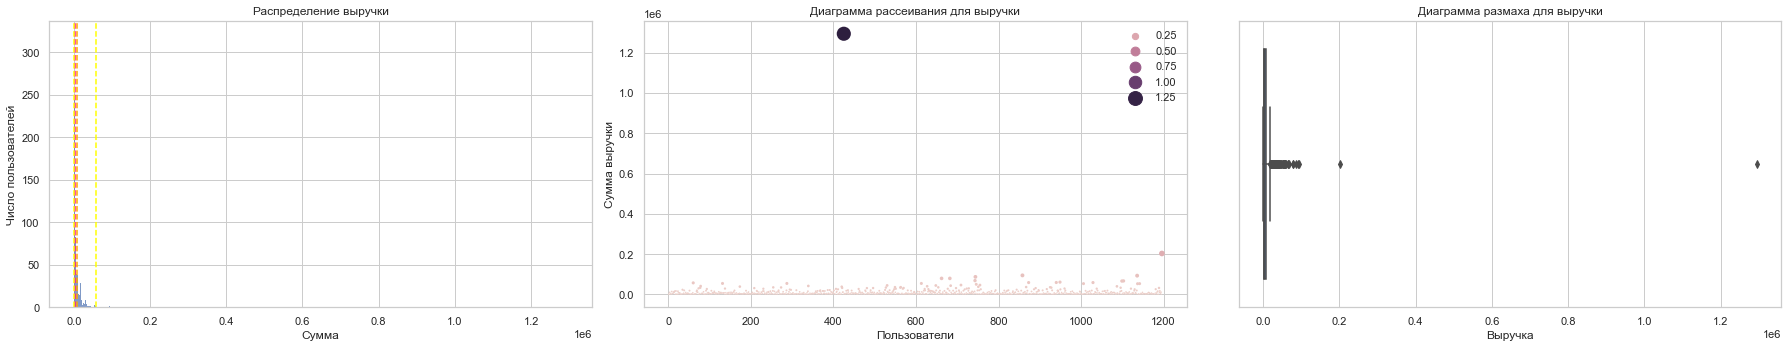

In [74]:
plotter(orders, 'revenue')

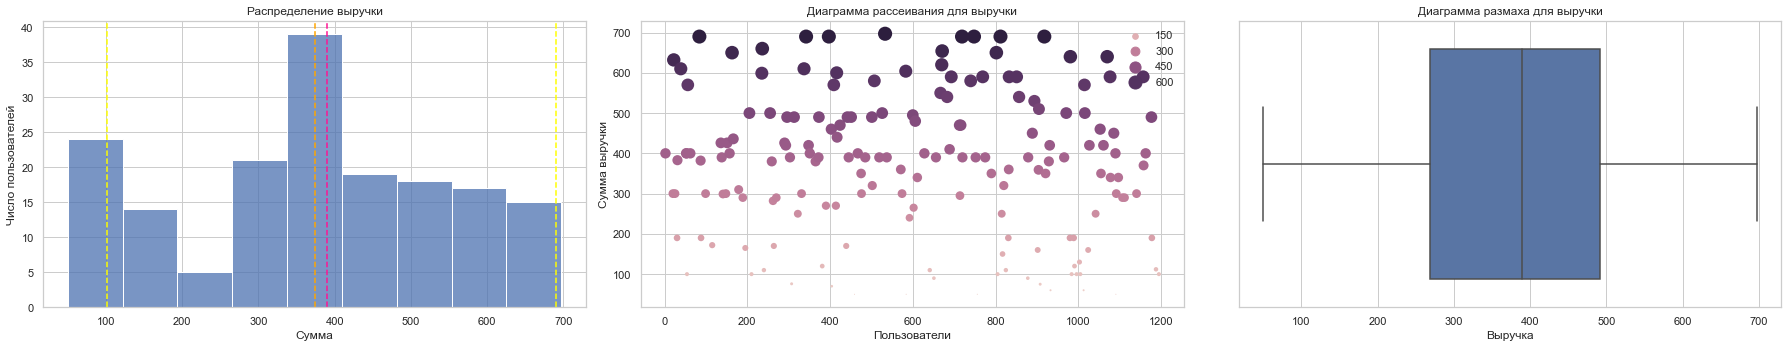

In [79]:
plotter(orders.query('revenue < 700'), 'revenue')